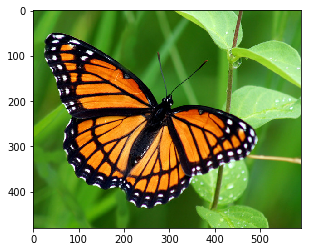

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

%matplotlib inline

image = cv2.imread('images/butterfly.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_copy = np.copy(image)

plt.imshow(image_copy)

In [8]:
# Reshape image into a 2D arrayof pixels and 3 color values(RGB)
pixel_vals = image_copy.reshape(-1,3)
print(np.shape(pixel_vals))
print(pixel_vals[:10, :])

# Convert to float type
pixel_vals = np.float32(pixel_vals)
print(np.shape(pixel_vals))
print(pixel_vals[:10, :])

(283680, 3)
[[ 53 128  27]
 [ 52 127  26]
 [ 54 126  27]
 [ 54 126  27]
 [ 53 124  28]
 [ 52 123  29]
 [ 52 121  28]
 [ 52 121  28]
 [ 56 120  26]
 [ 56 120  26]]
(283680, 3)
[[ 53. 128.  27.]
 [ 52. 127.  26.]
 [ 54. 126.  27.]
 [ 54. 126.  27.]
 [ 53. 124.  28.]
 [ 52. 123.  29.]
 [ 52. 121.  28.]
 [ 52. 121.  28.]
 [ 56. 120.  26.]
 [ 56. 120.  26.]]


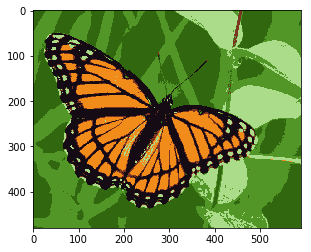

In [15]:
# Defien stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# To display this image, convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimesion
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)

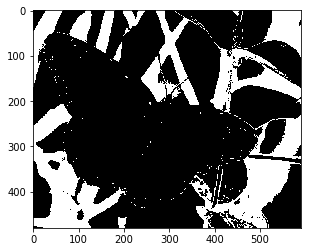

In [16]:
# Visualize one segment
plt.imshow(labels_reshape==1, cmap='gray')

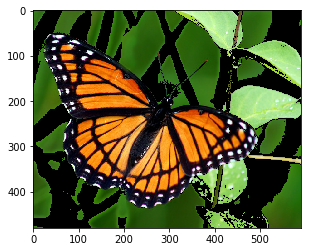

In [17]:
# Mask image segment
masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1] = [0,0,0]

plt.imshow(masked_image)